In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib

print("="*70)
print("C2C PROJECT - KMEANS CLUSTERING ON scaled DATA")
print("="*70)

# ============================================================
# STEP 1: Load scaled Data
# ============================================================
print("\n[Step 1] Loading scaled data...")
df_scaled = pd.read_csv('Data/df_scaled.csv')
print(f"✓ Loaded scaled data: {df_scaled.shape}")
print(f"  Samples: {df_scaled.shape[0]}")
print(f"  Features (Principal Components): {df_scaled.shape[1]}")
print(df_scaled.head())
df_scaled.drop(columns='Unnamed: 0',inplace=True)

C2C PROJECT - KMEANS CLUSTERING ON scaled DATA

[Step 1] Loading scaled data...
✓ Loaded scaled data: (10492, 56)
  Samples: 10492
  Features (Principal Components): 56
   Unnamed: 0  General_hearing_condition  Had_high_blood_pressure       WBC  \
0           0                        1.0                      1.0 -1.442156   
1           1                       -2.0                      1.0 -0.255801   
2           2                       -2.0                      0.0 -0.667065   
3           3                        0.0                      0.0  0.061874   
4           4                        0.0                      0.0 -0.126195   

   Haemoglobin  Platelete    Age  Education_Level  Household_Size  \
0     1.285714   0.057015 -0.125              0.5        0.436829   
1     0.928571  -0.524025  0.450              0.5       -0.563171   
2    -0.071429  -0.299138 -0.100             -0.5        1.356915   
3     0.000000   0.133994 -0.125             -1.0       -0.563171   
4     0.071

In [48]:
df_scaled.columns

Index(['General_hearing_condition', 'Had_high_blood_pressure', 'WBC',
       'Haemoglobin', 'Platelete', 'Age', 'Education_Level', 'Household_Size',
       'Income_to_Poverty_Ratio', 'Has_diabetes', 'Takes_vitamin_supplements',
       'Has_Disability', 'HDL_mg', 'Has_Hepatitis',
       'Covered_by_health_insurance', 'Tested_for_HIV_Virus',
       'General_health_condition', 'Received_Hepatitis_A_Vaccine',
       'Family_poverty_level_index', 'Has_Kidney_Failure', 'Had_Asthma',
       'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid',
       'Had_Liver_COndition', 'Had_Cancer', 'Teeth_and_gum_health',
       'Number_of_Moderate_Physical_activities_per_week',
       'Number_of_Vigorous_Physical_activities_per_week',
       'Number_of_hours_of_sleep', 'Cholestrol_level', 'SystolicBP',
       'DiastolicBP', 'Pulse', 'BODY_MEASURE_COMPOSITE', 'blood_macros',
       'mean_steroid_ng_dl', 'balance_symptom_score', 'balance_impact_score',
       'fall_risk_score', 'functional_difficulty_compos

In [49]:
# ============================================================
# STEP 2: Determine Optimal Number of Clusters
# ============================================================
print("\n[Step 2] Determining optimal number of clusters...")
print("-" * 70)

# Test range of cluster numbers
cluster_range = range(2, 21)

# Initialize metrics dictionary
metrics = {
    'n_clusters': [],
    'inertia': [],
    'silhouette': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

print("\nTesting different numbers of clusters...\n")

# Evaluate each k
for k in cluster_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels = kmeans.fit_predict(df_scaled)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_scaled, labels)
    davies_bouldin = davies_bouldin_score(df_scaled, labels)
    calinski = calinski_harabasz_score(df_scaled, labels)
    
    # Store metrics
    metrics['n_clusters'].append(k)
    metrics['inertia'].append(inertia)
    metrics['silhouette'].append(silhouette)
    metrics['davies_bouldin'].append(davies_bouldin)
    metrics['calinski_harabasz'].append(calinski)
    
    # Print results
    print(f"k={k}:")
    print(f"  Inertia: {inertia:,.2f}")
    print(f"  Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")
    print(f"  Calinski-Harabasz Score: {calinski:,.2f} (higher is better)")
    print()


[Step 2] Determining optimal number of clusters...
----------------------------------------------------------------------

Testing different numbers of clusters...

k=2:
  Inertia: 285,387.38
  Silhouette Score: 0.2516 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 1.3155 (lower is better)
  Calinski-Harabasz Score: 2,416.11 (higher is better)

k=3:
  Inertia: 242,240.55
  Silhouette Score: 0.2677 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 1.5020 (lower is better)
  Calinski-Harabasz Score: 2,357.22 (higher is better)

k=4:
  Inertia: 229,398.81
  Silhouette Score: 0.1350 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 2.4199 (lower is better)
  Calinski-Harabasz Score: 1,855.00 (higher is better)

k=5:
  Inertia: 221,412.23
  Silhouette Score: 0.1215 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 2.5185 (lower is better)
  Calinski-Harabasz Score: 1,535.86 (higher is better)

k=6:
  Inertia: 214,520.17
  Silhouette Score: 0.1164 (hig

[Step 3] Visualizing clustering evaluation metrics...


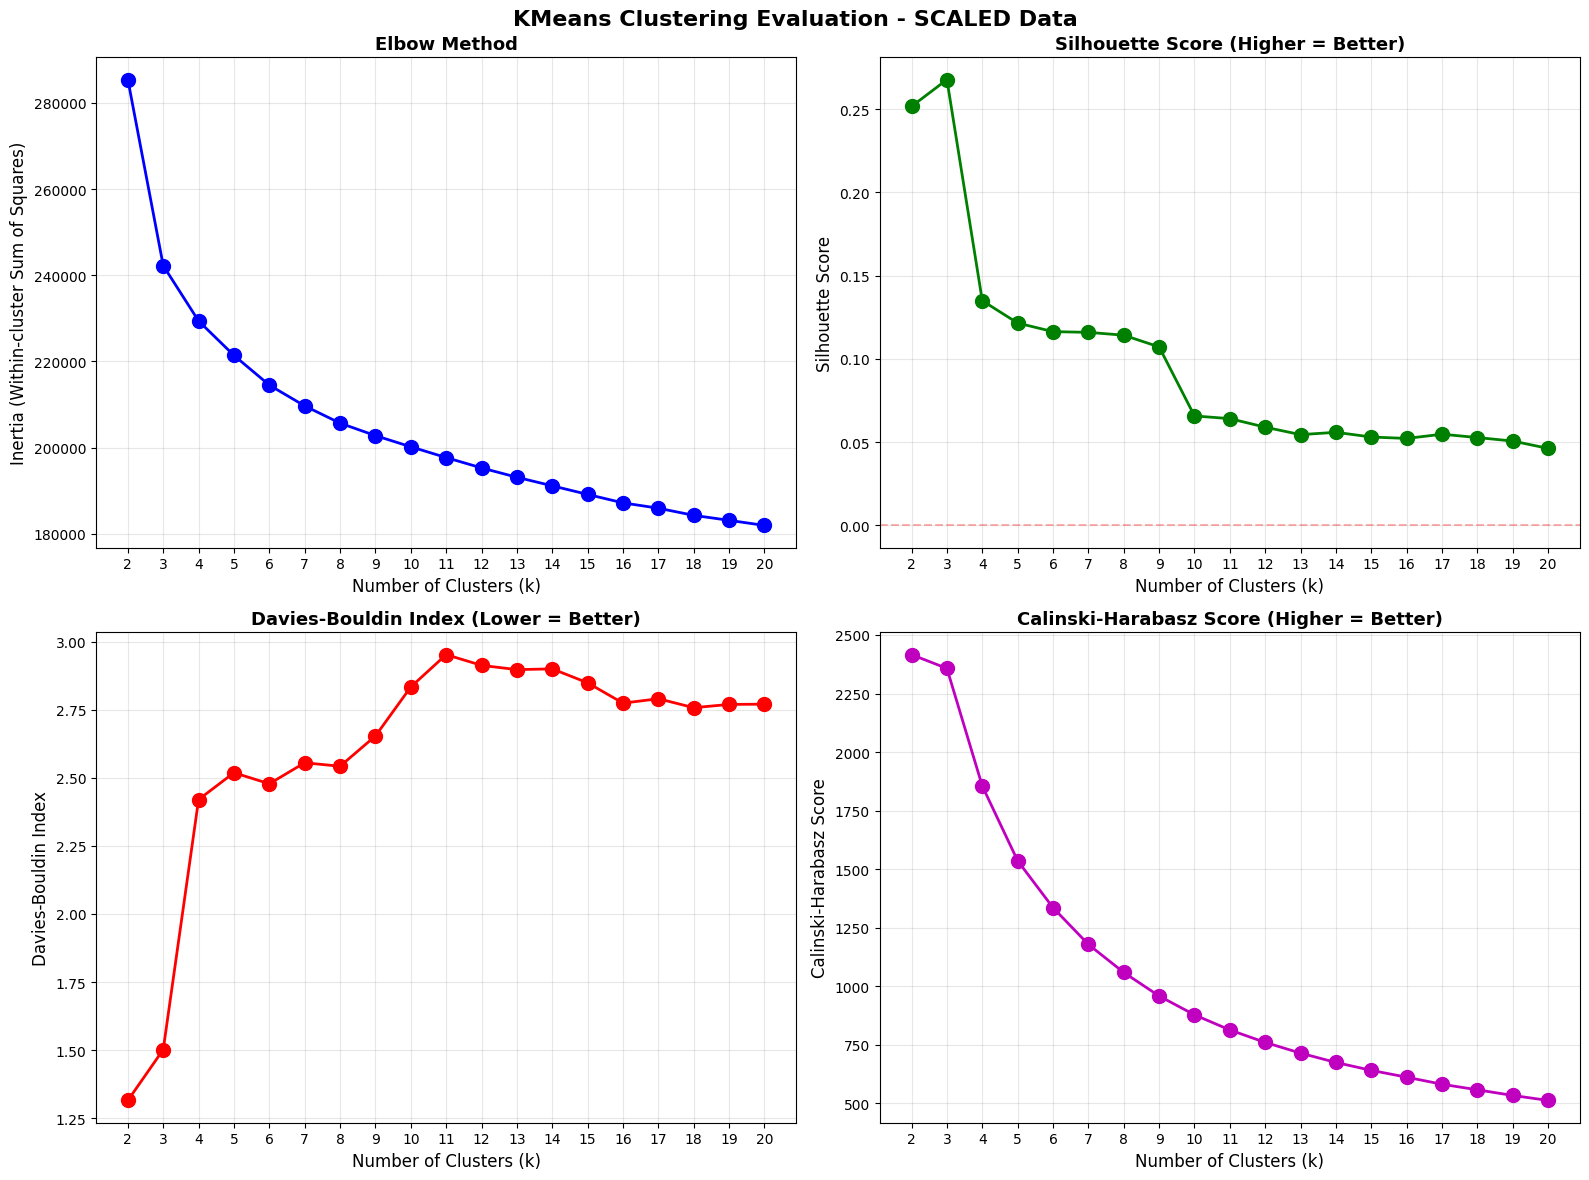

In [50]:
# ============================================================
# STEP 3: Visualize Evaluation Metrics
# ============================================================
print("[Step 3] Visualizing clustering evaluation metrics...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('KMeans Clustering Evaluation - SCALED Data', fontsize=16, fontweight='bold')

# 1. Elbow Method (Inertia)
axes[0, 0].plot(metrics['n_clusters'], metrics['inertia'], 'bo-', 
               linewidth=2, markersize=10)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 0].set_ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
axes[0, 0].set_title('Elbow Method', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics['n_clusters'])

# 2. Silhouette Score
axes[0, 1].plot(metrics['n_clusters'], metrics['silhouette'], 'go-', 
               linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 1].set_title('Silhouette Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics['n_clusters'])
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 3. Davies-Bouldin Index
axes[1, 0].plot(metrics['n_clusters'], metrics['davies_bouldin'], 'ro-', 
               linewidth=2, markersize=10)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 0].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1, 0].set_title('Davies-Bouldin Index (Lower = Better)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics['n_clusters'])

# 4. Calinski-Harabasz Score
axes[1, 1].plot(metrics['n_clusters'], metrics['calinski_harabasz'], 'mo-', 
               linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 1].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[1, 1].set_title('Calinski-Harabasz Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics['n_clusters'])

plt.tight_layout()
plt.show()

In [51]:
# ============================================================
# STEP 4: Recommend Optimal k
# ============================================================
print("\n[Step 4] Recommendations for optimal k:")
print("-" * 70)

# Find best k for each metric
best_silhouette_k = metrics['n_clusters'][np.argmax(metrics['silhouette'])]
best_db_k = metrics['n_clusters'][np.argmin(metrics['davies_bouldin'])]
best_ch_k = metrics['n_clusters'][np.argmax(metrics['calinski_harabasz'])]

print(f"Best k by Silhouette Score: {best_silhouette_k}")
print(f"Best k by Davies-Bouldin Index: {best_db_k}")
print(f"Best k by Calinski-Harabasz Score: {best_ch_k}")

# Calculate elbow using rate of change
inertia_diff = np.diff(metrics['inertia'])
inertia_diff_pct = (inertia_diff / metrics['inertia'][:-1]) * 100
elbow_k = metrics['n_clusters'][np.argmin(np.abs(inertia_diff_pct + 10)) + 1]  # Approximate elbow
print(f"Approximate elbow point: {elbow_k}")



[Step 4] Recommendations for optimal k:
----------------------------------------------------------------------
Best k by Silhouette Score: 3
Best k by Davies-Bouldin Index: 2
Best k by Calinski-Harabasz Score: 2
Approximate elbow point: 4


In [52]:
# ============================================================
# STEP 5: Apply Final Clustering
# ============================================================

# Prompt for optimal k (you can change this based on the plots)
optimal_k = 4

print(f"\n[Step 5] Applying KMeans with k={optimal_k}...")
print("-" * 70)

# Fit final KMeans model
kmeans_final = KMeans(
    n_clusters=optimal_k, 
    random_state=42, 
    n_init=50,  # More initializations for stability
    max_iter=300
)

cluster_labels = kmeans_final.fit_predict(df_scaled)

# Add cluster labels to dataframe
df_without_clusters = df_scaled.copy()
df_scaled['Cluster'] = cluster_labels

print(f"✓ Clustering complete with k={optimal_k}")

# Calculate final metrics
final_silhouette = silhouette_score(df_scaled.drop(columns='Cluster'), cluster_labels)
final_db = davies_bouldin_score(df_scaled.drop(columns='Cluster'), cluster_labels)
final_ch = calinski_harabasz_score(df_scaled.drop(columns='Cluster'), cluster_labels)

print(f"\nFinal Clustering Metrics:")
print(f"  Silhouette Score: {final_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {final_db:.4f}")
print(f"  Calinski-Harabasz Score: {final_ch:,.2f}")




[Step 5] Applying KMeans with k=4...
----------------------------------------------------------------------
✓ Clustering complete with k=4

Final Clustering Metrics:
  Silhouette Score: 0.1348
  Davies-Bouldin Index: 2.4198
  Calinski-Harabasz Score: 1,855.00


In [53]:
# ============================================================
# STEP 6: Analyze Cluster Distribution
# ============================================================
print("\n[Step 6] Cluster distribution analysis...")
print("-" * 70)

cluster_counts = df_scaled['Cluster'].value_counts().sort_index()
cluster_percentages = (df_scaled['Cluster'].value_counts(normalize=True) * 100).sort_index()

print("\nCluster Sizes:")
for cluster_id in range(optimal_k):
    count = cluster_counts[cluster_id]
    pct = cluster_percentages[cluster_id]
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.2f}%)")

# Check for imbalanced clusters
min_size = cluster_counts.min()
max_size = cluster_counts.max()
imbalance_ratio = max_size / min_size

print(f"\nCluster Balance:")
print(f"  Largest cluster: {max_size:,} patients")
print(f"  Smallest cluster: {min_size:,} patients")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}x")

if imbalance_ratio >= 2:
    print("  ⚠️  WARNING: Highly imbalanced clusters detected!")
elif imbalance_ratio >= 1.5:
    print("  ⚠️  CAUTION: Moderately imbalanced clusters")
else:
    print("  ✓ Clusters are reasonably balanced")


# ============================================================#
df_scaled.to_csv('clustered_scaled_data.csv', index=False)



[Step 6] Cluster distribution analysis...
----------------------------------------------------------------------

Cluster Sizes:
  Cluster 0: 1,168 patients (11.13%)
  Cluster 1: 1,700 patients (16.20%)
  Cluster 2: 3,691 patients (35.18%)
  Cluster 3: 3,933 patients (37.49%)

Cluster Balance:
  Largest cluster: 3,933 patients
  Smallest cluster: 1,168 patients
  Imbalance ratio: 3.37x
  ⚠️  WARNING: Highly imbalanced clusters detected!


## Recsys

In [57]:
# # Load the preprocessed patient data WITHOUT the index column
# processed_patient = pd.read_csv('Data/processed_new_patient.csv')


In [58]:
# processed_patient

In [59]:
# # Make sure to remove 'Cluster' column if it exists
# if 'Cluster' in processed_patient.columns:
#     processed_patient = processed_patient.drop(columns=['Cluster'])

# # Now use your kmeans_final model to predict the cluster
# cluster_assignment = kmeans_final.predict(processed_patient)

# print(f"New patient assigned to Cluster: {cluster_assignment[0]}")
# cluster_assignment = kmeans_final.predict(processed_patient)
